In [111]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

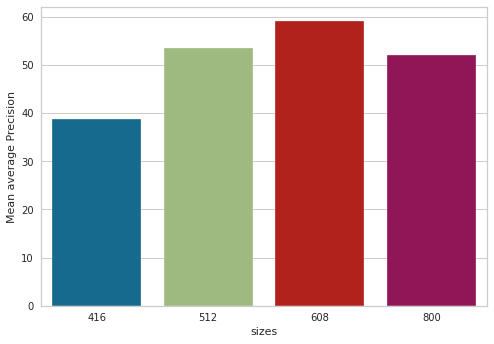

In [112]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import make_pipeline
from yellowbrick.regressor import ResidualsPlot

maps = [38.7, 53.6, 59.1, 52]
sizes = [416, 512, 608, 800]
fig = sns.barplot(x=sizes, y=maps)
fig.set(ylabel="Mean average Precision", xlabel="sizes")
fig = fig.get_figure()
fig.savefig("meanaverageprecision.png", dpi=700)

In [113]:
mem_800 = pd.read_csv("/home/md273/model_zoo/800_mem/memory_usage.csv")
mem_800.tail()

,Unnamed: 0,Reading,Memory Util,Memory Total,Memory Used,GPU Load
100,100,0,0.876179,12195.0,10685.0,0.0
101,101,0,0.876179,12195.0,10685.0,0.0
102,102,0,0.876179,12195.0,10685.0,0.0
103,103,0,0.876179,12195.0,10685.0,0.0
104,104,0,0.876179,12195.0,10685.0,0.0


In [114]:
mem_608 = pd.read_csv("/home/md273/model_zoo/608_mem/memory_usage.csv")

In [115]:
mem_320 = pd.read_csv("/home/md273/model_zoo/320_mem/memory_usage.csv")
mem_416 = pd.read_csv("/home/md273/model_zoo/416_mem/memory_usage.csv")
mem_512 = pd.read_csv("/home/md273/model_zoo/512_mem/memory_usage.csv")
mem_736 = pd.read_csv("/home/md273/model_zoo/736_mem/memory_usage.csv")
mem_896 = pd.read_csv("/home/md273/model_zoo/896_mem/memory_usage.csv")
mem_960 = pd.read_csv("/home/md273/model_zoo/960_mem/memory_usage.csv")
mem_1024 = pd.read_csv("/home/md273/model_zoo/1024_mem/memory_usage.csv")

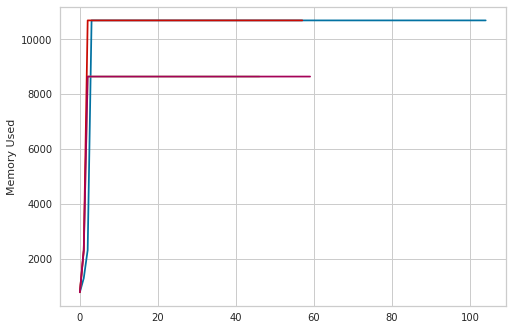

In [116]:
sns.lineplot(mem_800.index, mem_800["Memory Used"])
sns.lineplot(mem_608.index, mem_608["Memory Used"])
sns.lineplot(mem_736.index, mem_736["Memory Used"])
sns.lineplot(mem_512.index, mem_512["Memory Used"])
# sns.lineplot(mem_416.index, mem_416["Memory Used"])

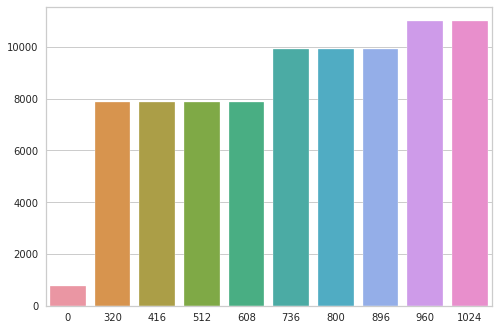

In [117]:
bar_max = [
    771,
    (mem_320["Memory Used"] - 771).max(),
    (mem_416["Memory Used"] - 771).max(),
    (mem_512["Memory Used"] - 771).max(),
    (mem_608["Memory Used"] - 771).max(),
    (mem_736["Memory Used"] - 771).max(),
    (mem_800["Memory Used"] - 771).max(),
    (mem_896["Memory Used"] - 771).max(),
    (mem_960["Memory Used"] - 771).max(),
    (mem_1024["Memory Used"] - 771).max(),
]

sns.barplot([0, 320, 416, 512, 608, 736, 800, 896, 960, 1024], bar_max)

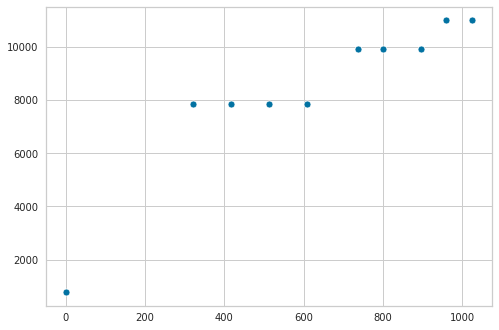

In [118]:
sns.scatterplot([0, 320, 416, 512, 608, 736, 800, 896, 960, 1024], bar_max)

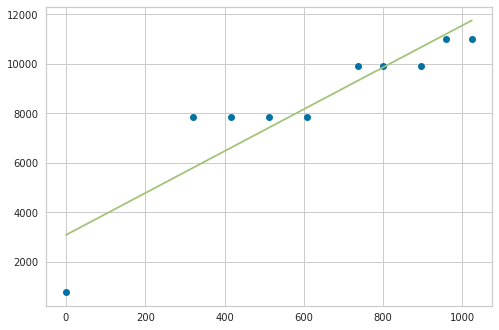

In [119]:
x = np.array([0, 320, 416, 512, 608, 736, 800, 896, 960, 1024])
plt.plot(x, bar_max, "o")
m, b = np.polyfit(x, bar_max, 1)

plt.plot(x, m * x + b)

In [120]:
mem_896["Memory Used"].unique()

array([  771.,  2307., 10685.])

In [121]:
mem_800["Memory Used"].unique()

array([  771.,  1283.,  2307., 10685.])

In [122]:
(mem_800["Memory Used"] - mem_800["Memory Used"].unique()[1]).max()

9402.0

In [123]:
(mem_1024["Memory Used"] - mem_1024["Memory Used"].unique()[1]).max()

9458.0

[[    0.   771.]
 [  320.  7866.]
 [  416.  7866.]
 [  512.  7866.]
 [  608.  7866.]
 [  736.  9914.]
 [  800.  9914.]
 [  896.  9914.]
 [  960. 10994.]
 [ 1024. 10994.]]
[[   0]
 [ 320]
 [ 416]
 [ 512]
 [ 608]
 [ 736]
 [ 800]
 [ 896]
 [ 960]
 [1024]]
[[  771.]
 [ 7866.]
 [ 7866.]
 [ 7866.]
 [ 7866.]
 [ 9914.]
 [ 9914.]
 [ 9914.]
 [10994.]
 [10994.]]


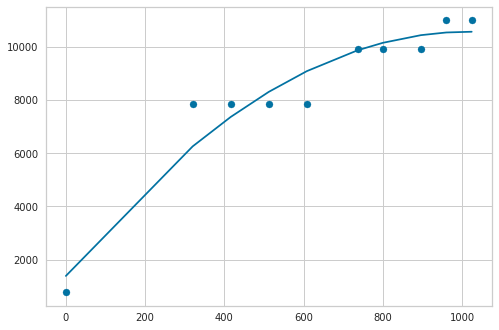

In [124]:
results = pd.DataFrame({"size": [0, 320, 416, 512, 608, 736, 800, 896, 960, 1024], "mem": bar_max})
print(results.to_numpy())
print(results["size"].to_numpy().reshape(-1, 1))
print(results["mem"].to_numpy().reshape(-1, 1))
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4)
model_yolo = make_pipeline(PolynomialFeatures(2), Ridge())

x_train = results["size"].to_numpy().reshape(-1, 1)
y_train = results["mem"].to_numpy().reshape(-1, 1)
model_yolo.fit(X=x_train, y=y_train)
y_plot = model_yolo.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, y_plot, label="degree %d" % 2)

In [125]:
model_yolo.predict([[20000]])


array([[-3193947.0573396]])

[[    0.   771.]
 [  320.  7866.]
 [  416.  7866.]
 [  512.  7866.]
 [  608.  7866.]
 [  736.  9914.]
 [  800.  9914.]
 [  896.  9914.]
 [  960. 10994.]
 [ 1024. 10994.]]
[[   0]
 [ 320]
 [ 416]
 [ 512]
 [ 608]
 [ 736]
 [ 800]
 [ 896]
 [ 960]
 [1024]]
[[  771.]
 [ 7866.]
 [ 7866.]
 [ 7866.]
 [ 7866.]
 [ 9914.]
 [ 9914.]
 [ 9914.]
 [10994.]
 [10994.]]


array([[172440.75441365]])

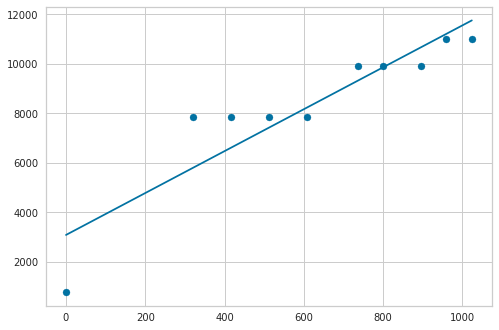

In [126]:
results = pd.DataFrame({"size": [0, 320, 416, 512, 608, 736, 800, 896, 960, 1024], "mem": bar_max})
print(results.to_numpy())
print(results["size"].to_numpy().reshape(-1, 1))
print(results["mem"].to_numpy().reshape(-1, 1))
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(PolynomialFeatures(1), Ridge())

x_train_gpu = results["size"].to_numpy().reshape(-1, 1)
y_train_gpu = results["mem"].to_numpy().reshape(-1, 1)
model.fit(X=x_train_gpu, y=y_train_gpu)
y_plot_gpu = model.predict(x_train_gpu)
plt.scatter(x_train_gpu, y_train_gpu)
plt.plot(x_train_gpu, y_plot_gpu, label="degree %d" % 2)
model.predict([[20000]])

In [127]:
dense_results = pd.read_csv("/home/md273/dense_darknet_gpu.csv")
dense_results.head()

,Input,Memory Usage,Time,Params,Batch Size
0,320,2538.0,55.40,34515624,2
1,416,3669.3,65.00,34515625,2
2,608,6108.0,107.29,34515626,2
3,800,9079.6,163.36,34515627,2
4,1024,11908.7,257.00,34515628,2


In [128]:
x_train_dense = dense_results["Input"].to_numpy().reshape(-1, 1)
y_train_dense = dense_results["Memory Usage"].to_numpy().reshape(-1, 1)

In [129]:
dense_1_results = pd.read_csv("/home/md273/dense_darknet_1_cpu.csv")
dense_1_results = dense_1_results[dense_1_results["Batch Size"] == 2]
x_train_dense_1 = dense_1_results["Input"].to_numpy().reshape(-1, 1)
y_train_dense_1 = dense_1_results["Memory Usage"].to_numpy().reshape(-1, 1)

In [157]:
import seaborn as sns

sns.set_style("whitegrid")
cpu_results = pd.DataFrame(
    {
        "size": [160, 320, 416, 512, 608, 800, 1024, 1248, 1440, 1568, 1664],
        "param": [61608652 for i in range(11)],
        "mem": [2200.9, 3273.8, 3969, 5134, 6405, 9810.5, 14698.6, 20953, 26323, 24057.8, 24664.5],
    }
)
print(cpu_results)
cpu_results.to_csv("/home/md273/yolo_3_mem.csv")
x_train = cpu_results["size"].to_numpy().reshape(-1, 1)
y_train = cpu_results["mem"].to_numpy().reshape(-1, 1)
model_yolo = make_pipeline(PolynomialFeatures(1), Ridge())
model_dense_2 = make_pipeline(PolynomialFeatures(1), Ridge())
model_yolo.fit(X=x_train, y=y_train)
model_dense_2.fit(x_train_dense, y_train_dense)
print(model_dense_2.coef_)
plt.scatter(x_train, y_train, label="YOLO V3")
plt.scatter(x_train_dense, y_train_dense, label="Dense Darknet 2 Outputs")
plt.scatter(x_train_dense_1, y_train_dense_1, label="Dense Darknet 2 Outputs")
y_plot = model_yolo.predict(x_train)
y_plot_dense = model_dense_2.predict(x_train_dense)
plt.plot(x_train, y_plot)
plt.plot(x_train_dense, y_plot_dense)
plt.xlabel("Image Size")
plt.ylabel("Memory Training In MB")
plt.legend()
plt.savefig("/home/md273/example.png", dpi=1200)
model_yolo.predict([[20000]])

    size     param      mem
0    160  61608652   2200.9
1    320  61608652   3273.8
2    416  61608652   3969.0
3    512  61608652   5134.0
4    608  61608652   6405.0
5    800  61608652   9810.5
6   1024  61608652  14698.6
7   1248  61608652  20953.0
8   1440  61608652  26323.0
9   1568  61608652  24057.8
10  1664  61608652  24664.5


AttributeError: 'Pipeline' object has no attribute 'coef_'

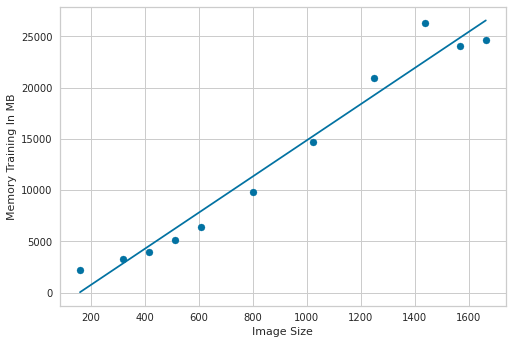

In [131]:
x_train = cpu_results["size"].to_numpy().reshape(-1, 1)
y_train = cpu_results["mem"].to_numpy().reshape(-1, 1)
model_yolo = Ridge()
model_yolo.fit(X=x_train, y=y_train)
plt.scatter(x_train, y_train, label="YOLO V3")
y_plot = model_yolo.predict(x_train)
plt.plot(x_train, y_plot)
plt.xlabel("Image Size")
plt.ylabel("Memory Training In MB")
plt.savefig("/home/md273/mem_og.png", dpi=1200, bbox_inches="tight")

[[14.85575675]]


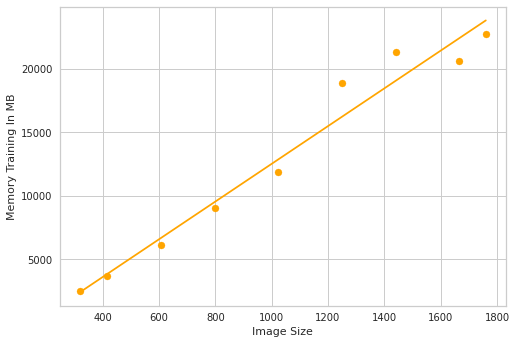

In [158]:
x_train_dense = dense_results["Input"].to_numpy().reshape(-1, 1)
y_train_dense = dense_results["Memory Usage"].to_numpy().reshape(-1, 1)
model_dense_2 = Ridge()
model_dense_2.fit(X=x_train_dense, y=y_train_dense)
plt.scatter(x_train_dense, y_train_dense, label="YOLO V3", c="orange")
y_plot_dense = model_dense_2.predict(x_train_dense)
print(model_dense_2.coef_)
plt.plot(x_train_dense, y_plot_dense, c="orange")
plt.xlabel("Image Size")
plt.ylabel("Memory Training In MB")
plt.savefig("/home/md273/mem_dense.png", dpi=1200, bbox_inches="tight")

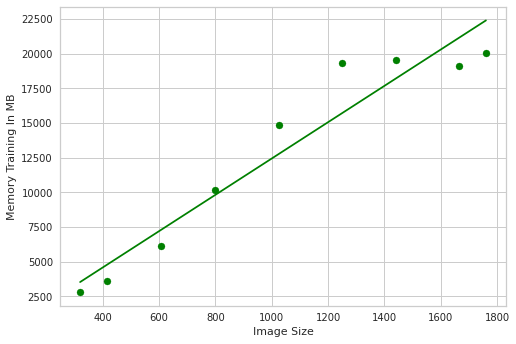

In [133]:
model_dense_1 = Ridge()
model_dense_1.fit(X=x_train_dense_1, y=y_train_dense_1)
plt.scatter(x_train_dense_1, y_train_dense_1, label="YOLO V3", c="green")
y_plot_dense_1 = model_dense_1.predict(x_train_dense_1)
plt.plot(x_train_dense_1, y_plot_dense_1, c="green")
plt.xlabel("Image Size")
plt.ylabel("Memory Training In MB")
plt.savefig("/home/md273/mem_dense_1.png", dpi=1200, bbox_inches="tight")

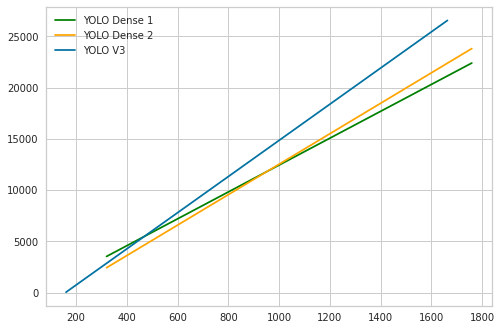

In [160]:
plt.plot(x_train_dense_1, y_plot_dense_1, c="green", label="YOLO Dense 1")
plt.plot(x_train_dense, y_plot_dense, c="orange", label="YOLO Dense 2")
plt.plot(x_train, y_plot, label="YOLO V3")
plt.legend()
plt.savefig("/home/md273/all.png", dpi=800, bbox_inches="tight")


In [134]:
print(f"Dense 1 output {model_yolo.coef_}")
print(f"Dense 1 output {model_dense_2.coef_}")
print(f"Dense 1 output {model_dense_1.coef_}")

Dense 1 output [[17.64077955]]
Dense 1 output [[14.85575675]]
Dense 1 output [[13.11057608]]


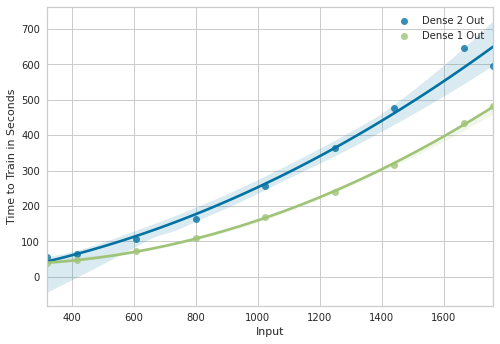

In [135]:
sns.regplot(x="Input", y="Time", data=dense_results, label="Dense 2 Out", order=2)
sns.regplot(x="Input", y="Time", data=dense_1_results, label="Dense 1 Out", order=2)
plt.legend()
plt.ylabel("Time to Train in Seconds")
plt.savefig("/home/md273/time_taken.png", dpi=1200, bbox_inches="tight")

/home/md273/anaconda3/envs/CS5099-SealCounting/lib/python3.8/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))


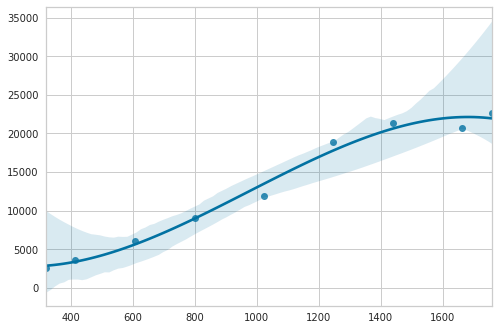

In [136]:
sns.regplot(x_train_dense, y_train_dense, label="YOLO V3", order=3)

In [137]:
memory_usage = pd.read_csv("/home/md273/mem_usage_all.csv")

In [138]:
corr = memory_usage.corr()

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_cor = memory_usage.corr()
df = memory_usage[["Input", "Params", "Batch Size", "Downsampling Factor"]]
X = add_constant(df)
# pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

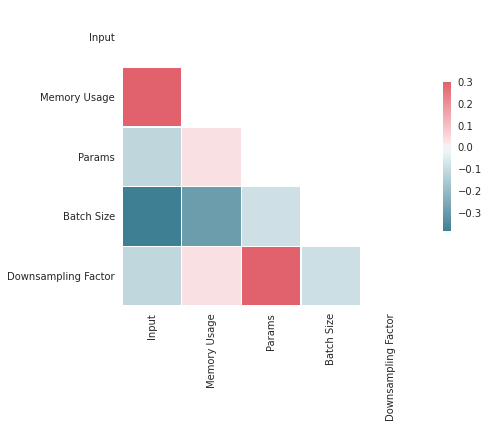

In [140]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
plt.savefig("/home/md273/mem_heatmap.png", dpi=600, bbox_inches="tight")

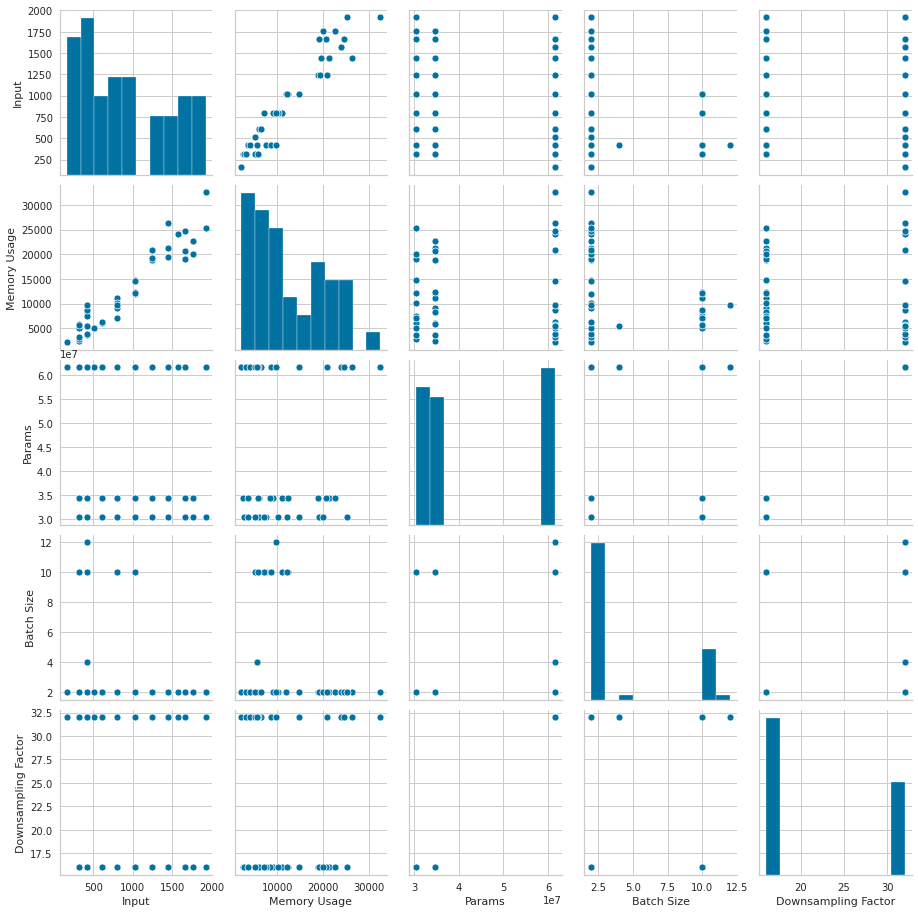

In [141]:
sns.pairplot(memory_usage)

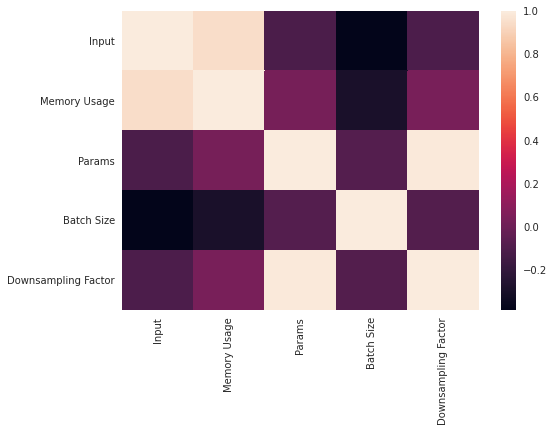

In [142]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr)
plt.savefig("/home/md273/mem_heatmap.png", dpi=600, bbox_inches="tight", cmap=cmap)

dict_keys(['memory', 'steps', 'verbose', 'polynomialfeatures', 'ridge', 'polynomialfeatures__degree', 'polynomialfeatures__include_bias', 'polynomialfeatures__interaction_only', 'polynomialfeatures__order', 'ridge__alpha', 'ridge__copy_X', 'ridge__fit_intercept', 'ridge__max_iter', 'ridge__normalize', 'ridge__random_state', 'ridge__solver', 'ridge__tol'])


/home/md273/anaconda3/envs/CS5099-SealCounting/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/md273/anaconda3/envs/CS5099-SealCounting/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/md273/anaconda3/envs/CS5099-SealCounting/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29796e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/md273/anaconda3/envs/CS5099-SealCounting/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65263e-20): result may not be accurate.
  return linalg.solve(A

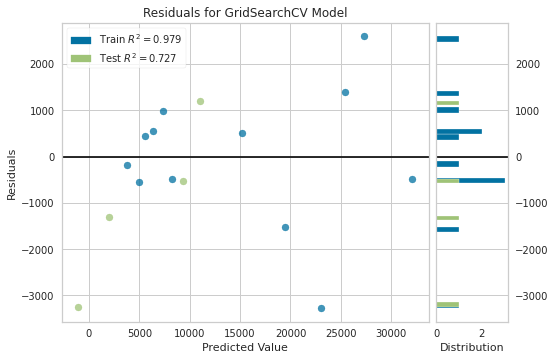

In [153]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

memory_usage = pd.read_csv("/home/md273/mem_usage_all.csv")

memory_usage = memory_usage[memory_usage["Params"] == 61608652]
x = memory_usage[["Input", "Batch Size"]].to_numpy()
y = memory_usage["Memory Usage"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=42
)

model = make_pipeline(PolynomialFeatures(), Ridge())
print(model.get_params().keys())
degrees = np.arange(1, 5)
cv_model = GridSearchCV(model, param_grid={"polynomialfeatures__degree": degrees}, scoring="r2")
visualizer = ResidualsPlot(cv_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show(outpath="/home/md273/residuals.png")
# Finalize and render the figure

In [154]:
cv_model.best_estimator_.named_steps

{'polynomialfeatures': PolynomialFeatures(degree=1), 'ridge': Ridge()}

In [155]:
cv_model.best_params_, cv_model.best_score_, cv_model.best_estimator_.named_steps["ridge"].coef_

({'polynomialfeatures__degree': 1},
 0.9575907423059735,
 array([  0.        ,  18.81683631, 546.53847312]))

In [156]:
cv_model.best_estimator_.named_steps["ridge"].intercept_

-5143.145300339944

    Input  Memory Usage    Params  Batch Size  Downsampling Factor
13    320        2793.2  30423684           2                   16
14    416        3603.0  30423684           2                   16
15    608        6137.4  30423684           2                   16
16    800       10188.2  30423684           2                   16
17   1024       14835.0  30423684           2                   16
18   1248       19346.6  30423684           2                   16
19   1440       19535.5  30423684           2                   16
20   1664       19128.5  30423684           2                   16
21   1760       20075.9  30423684           2                   16
22    320        5098.6  30423684          10                   16
23    416        7573.9  30423684          10                   16
24    800        7135.4  30423684          10                   16
25   1024       12081.0  30423684          10                   16
42   1920       25260.8  30423684           2                 

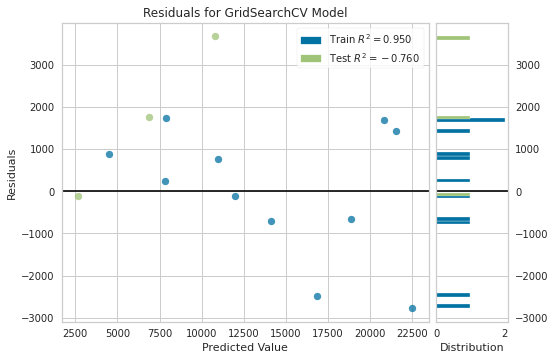

In [151]:
memory_usage = pd.read_csv("/home/md273/mem_usage_all.csv")
memory_usage = memory_usage[memory_usage["Params"] == 30423684]
print(memory_usage)
x = memory_usage[["Input", "Batch Size"]].to_numpy()
y = memory_usage["Memory Usage"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=42
)

model = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())
print(model.get_params().keys())
degrees = np.arange(1, 5)
cv_model = GridSearchCV(model, param_grid={"polynomialfeatures__degree": degrees}, scoring="r2")
visualizer = ResidualsPlot(cv_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show(outpath="/home/md273/residuals.png")

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, cv_model.predict(X_test))

In [ ]:
print(x[0])

In [ ]:
x_future = [[1920, 2], [20000, 20]]
# x_future = [[1920, 61608652, 2, 32]]
cv_model.predict(x_future)

In [ ]:
tensor_sizes = pd.read_csv("/home/md273/model_zoo/tensor_sizes.csv")[
    ["416", "512", "608", "800", "1024"]
].dropna()
print(tensor_sizes.head())
x_axis = [0, 1, 2, 3, 4, 5]

In [ ]:
tensor_sizes["416"]

In [ ]:
sns.lineplot(x=x_axis, y=tensor_sizes["416"], label="416")
sns.lineplot(x=x_axis, y=tensor_sizes["512"], label="512")
sns.lineplot(x=x_axis, y=tensor_sizes["608"], label="608")
sns.lineplot(x=x_axis, y=tensor_sizes["800"], label="800")
sns.lineplot(x=x_axis, y=tensor_sizes["1024"], label="1024")
plt.ylabel("Tensor Size")
plt.xlabel("Darknet Block")
plt.legend()
plt.savefig("/home/md273/model_zoo/tensor_size.png", dpi=1200)

In [ ]:
df = pd.read_csv("/home/md273/ablation_study.csv")

In [ ]:
df.head()
df = pd.melt(df, id_vars="Backbone", var_name="detector", value_name="Average Precision")
df

In [ ]:
sns.set_palette("deep")
sns.catplot(x="Backbone", y="Average Precision", hue="detector", data=df, kind="bar")

In [ ]:
df = pd.read_csv("/home/md273/ablation_study_params.csv")
df = pd.melt(df, id_vars="Backbone", var_name="detector", value_name="Parameters")

In [ ]:
sns.catplot(x="Backbone", y="Parameters", hue="detector", data=df, kind="bar")

In [ ]:
locations = pd.read_csv("/data2/seals/tfrecords/all.csv")
locations["y_pixel"] = locations["image_height"] - locations["y_pixel"]
locations["xmin"] = locations["x_pixel"] - 30
locations["xmax"] = locations["x_pixel"] + 30
locations["ymin"] = locations["y_pixel"] - 30
locations["ymax"] = locations["y_pixel"] + 30
seal_file = locations["tiff_file"].iloc[0]

In [ ]:
locations = locations[locations["tiff_file"] == seal_file]
locations

In [ ]:
from PIL import Image
from matplotlib.patches import Rectangle

sns.set_style("dark")
with Image.open(f"/data2/seals/TIFFs/{seal_file}") as image:
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    for index, row in locations[["xmin", "ymin", "xmax", "ymax"]].iterrows():
        patch = Rectangle(
            (row["xmin"], row["ymin"]),
            row["xmax"] - row["xmin"],
            row["ymax"] - row["ymin"],
            linewidth=1,
            edgecolor="r",
            facecolor="none",
        )
        ax.add_patch(patch)
    fig.savefig("/home/md273/example_plt.png", dpi=1600, bbox_inches="tight")